# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras_metrics
from keras import layers
#from keras import models
from keras import optimizers
from keras import models
from keras import layers
import keras_metrics
from sklearn.model_selection import RandomizedSearchCV 

np.random.seed(123)

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

#!{sys.executable} -m pip install opencv-python

import time
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.metrics import roc_curve#, plot_roc_curve

np.random.seed(123)

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.pipeline import make_pipeline

import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import roc_curve#, plot_roc_curve


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
test_folder = 'data/test'
train_folder = 'data/train'
val_folder = 'data/val'

In [4]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64,64), batch_size = 627) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64,64), batch_size = 19)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64,64), batch_size=5219)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [5]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [6]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [ ]:
train_img.shape

model | accuracy | recall
--- | --- | --- |
baseline | .75 | 
CNN | 0.55 | 0.74 - 0.88

## Build a baseline model (fully connected)
- Accuracy for train: .99 </br>
- Accuracy for val: .81 </br>
- Our model is overfitting
- Create a new model with dropout

In [ ]:
np.random.seed(123)
model = models.Sequential()
model.add( Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add( Dense(7, activation='relu'))
model.add( Dense(5, activation='relu'))
model.add( Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=16,
                    validation_data=(val_img, val_y), verbose = 1)

In [ ]:
results_train = model.evaluate(train_img, train_y)

In [ ]:
results_train

In [ ]:
results_val = model.evaluate(val_img, val_y)

In [ ]:
results_val

In [ ]:
model.summary()

# CNN

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64 ,64,  3)))

model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Dropout(0.1))  

model.add(layers.Conv2D(12, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Dropout(0.05))  

model.add(layers.Conv2D(18, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.0025)) 


model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

history = model.fit(train_images,
                    train_y,
                    epochs=5,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=0)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_1:0' shape=() dtype=int32> fn
Instructions for updating:
Use tf.cast instead.


In [11]:
results_train = model.evaluate(train_images, train_y)

5216/5216 [==============================] - 3s 519us/step


In [12]:
results_test = model.evaluate(val_images, val_y)

16/16 [==============================] - 0s 637us/step


In [13]:
results_train

[0.18737361413295284, 0.9148772954940796, 0.7015673518180847]

In [14]:
results_test

[0.9524639844894409, 0.625, 0.25]

In [ ]:
model.predict_classes(val_images)

In [ ]:
model.summary()

---

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = history.history['recall']
val_rec = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Confusion Matrix, without normalization
[[3847   28]
 [ 416  925]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      3875
         1.0       0.97      0.69      0.81      1341

    accuracy                           0.91      5216
   macro avg       0.94      0.84      0.88      5216
weighted avg       0.92      0.91      0.91      5216

roc_auc_score: 0.8412789685117029


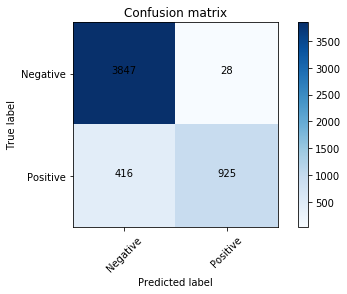

In [15]:
y_pred = model.predict_classes(train_images)

cm = confusion_matrix(train_y, y_pred)
classes = ['Negative', 'Positive']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(train_y, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(train_y, y_pred))

In [ ]:
y_pred_van = model.predict(test_images)
y_prob_van = model.predict_proba(test_images)

In [ ]:
fpr, tpr, thresholds = roc_curve(train_images, y_prob[:,1])
fpr_v, tpr_v, thresholds_v = roc_curve(y_test, y_prob_van[:,1])

In [ ]:
    def plot_roc_curve(fpr, tpr, label = None):
        plt.plot(fpr, tpr, linewidth =5 , label = label)
        plt.plot([0,1], [0,1], 'k--')
        plt.axis([0, 1, 0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

    plot_roc_curve(fpr_v, tpr_v, label = 'Vanilla')
    plot_roc_curve(fpr, tpr, label = 'Tuned Model')
    plt.legend()
    plt.show()